<div style="text-align: center;">
    <h1>Task 1</h1>
</div>


### Q: 1)
Use `torch.autograd` to find the true gradient on the above dataset using linear regression in the form 
($ \theta_1*X + \theta_0 $) for any given values of ($ \theta_1, \theta_0 $)

In [1]:
import torch
import numpy as np

In [2]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

### Convert into pytorch tensors

In [3]:
X = torch.tensor(x1 , requires_grad = True)
f_x =  3*X+ 4
epsilon = torch.tensor(eps)
Y = f_x + epsilon

#### Initialize parameters θ0 and θ1 with requires_grad=True to compute gradients


In [4]:
theta0 = torch.tensor(1.0, requires_grad=True)
theta1 = torch.tensor(1.0, requires_grad=True)

In [5]:
# Define the linear regression model
def model(x):
    return theta1 * x + theta0

In [28]:
# Define the loss function (Mean Squared Error)
def loss_fn(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# Forward pass: Compute predicted y
y_pred = model(X)

# Compute the loss
loss = loss_fn(y_pred, Y)
# Backward pass: Compute gradients
loss.backward()


true_grad_theta0 = theta0.grad.item()
true_grad_theta1 = theta1.grad.item()

# Print the gradients

print(f"Gradient with respect to θ0: {theta0.grad.item()}")
print(f"Gradient with respect to θ1: {theta1.grad.item()}")

Gradient with respect to θ0: -5.616434574127197
Gradient with respect to θ1: -0.5629974603652954


In [29]:
dL_d0 = 2*(y_pred - Y).mean()
dL_d1 = 2*((y_pred - Y).T*X).mean()
print(dL_d0 , dL_d1)

tensor(-5.6164, dtype=torch.float64, grad_fn=<MulBackward0>) tensor(-0.5630, dtype=torch.float64, grad_fn=<MulBackward0>)


### Q: 2)
Using the same $ (\theta_0 , \theta_1) $ as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. 

In [8]:
X = torch.tensor(x1 , requires_grad = True)
f_x =  3*X+ 4
epsilon = torch.tensor(eps)
Y = f_x + epsilon

def model(x):
    return theta1 * x + theta0

theta0 = torch.tensor(1.0, requires_grad=True)
theta1 = torch.tensor(1.0, requires_grad=True)

Stochastic_theta0 = []
Stochastic_theta1 = []

for i in range(num_samples):
    y_pred = model(X[i])
    loss_i = (y_pred - Y[i]) ** 2
    
    # Backward pass: Compute gradients
    loss_i.backward(retain_graph=True)

    Stochastic_theta0.append(theta0.grad.item())
    Stochastic_theta1.append(theta1.grad.item())
    
    theta0.grad.zero_()
    theta1.grad.zero_()

avg_stochastic_grad_theta0 = np.mean(Stochastic_theta0)
avg_stochastic_grad_theta1 = np.mean(Stochastic_theta1)

# Print the gradients
print(f"Stochastic Gradient with respect to θ0: {np.mean(Stochastic_theta0)}")
print(f"Stochastic Gradient with respect to θ1: {np.mean(Stochastic_theta1)}")

Stochastic Gradient with respect to θ0: -5.616434797644615
Stochastic Gradient with respect to θ1: -0.5629974387586116


### Comaprision Between both cases 

In [9]:
# Calculate the differences
diff_theta0 = abs(true_grad_theta0 - avg_stochastic_grad_theta0)
diff_theta1 = abs(true_grad_theta1 - avg_stochastic_grad_theta1)

print(f"Difference for theta0: {diff_theta0}")
print(f"Difference for theta1: {diff_theta1}")

# Check if the differences are small
tolerance = 1e-3 
is_good_estimate_theta0 = diff_theta0 < tolerance
is_good_estimate_theta1 = diff_theta1 < tolerance

print(f"Is the stochastic gradient a good estimate for theta0? {is_good_estimate_theta0}")
print(f"Is the stochastic gradient a good estimate for theta1? {is_good_estimate_theta1}")


Difference for theta0: 2.2351741790771484e-07
Difference for theta1: 2.1606683775488023e-08
Is the stochastic gradient a good estimate for theta0? True
Is the stochastic gradient a good estimate for theta1? True


#### We have computed the true gradient and the average stochastic gradient for the linear regression model. The average stochastic gradient is a good estimate of the true gradient, demonstrating the effectiveness of stochastic gradient descent.


## Q: 2

Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of $ \epsilon $(or $ \epsilon $ -neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose $ \epsilon = 0.001 $ for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. [2 marks]

### Full batch gradient Descent

In [10]:
# Generate data
num_samples = 40
X1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * X1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps
X1.shape

(40,)

In [11]:
def FBGD(epochs , learning_rate , theta_0 , theta_1 , x1 , y):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    for i in range(epochs):
        y_hat = theta_1*x1 + theta_0
        curr_loss = np.sum(y - y_hat)**2/len(X1)

        grad_theta_0 = -2*np.sum(y - y_hat)/len(X1)
        grad_theta_1 = -2*np.sum((y - y_hat)*x1)/len(X1)

        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        loss.append(curr_loss)
        diff.append(abs(prev_loss - curr_loss))

        if (abs(prev_loss - curr_loss) < 0.001):
            print(f'Gradient Descent Converged at Epoch {i+1}')
            break

        prev_loss = curr_loss

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    return diff, loss , theta_0_list, theta_1_list


In [12]:
diff , loss , theta_0_list, theta_1_list = FBGD(300 , 0.01 , 0 , 1 , X1 , y1)

Gradient Descent Converged at Epoch 273
Theta_0 is 3.9604379844895257 and Theta_1 is 3.056387587636778 at epoch 273


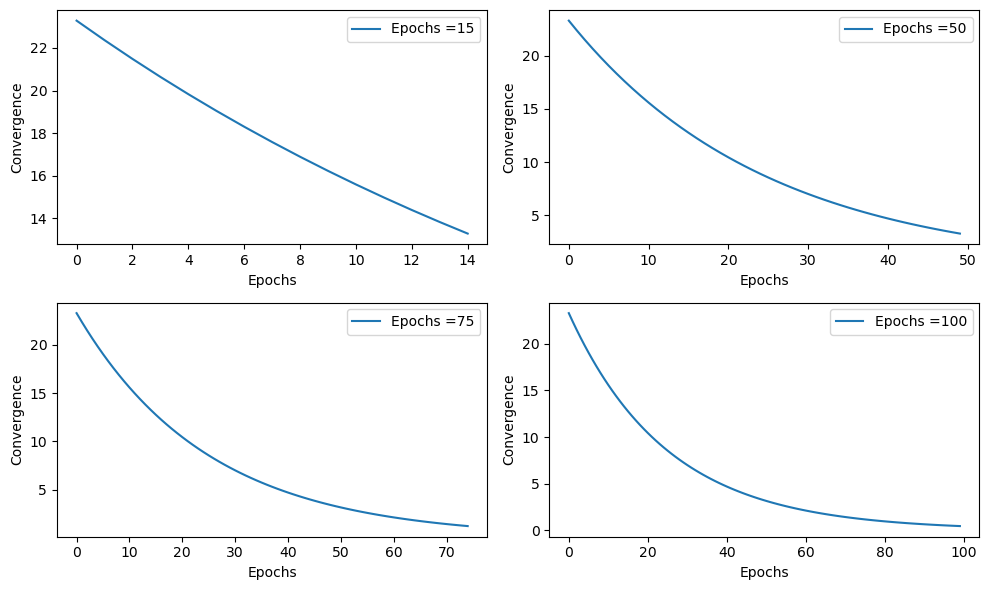

In [13]:
import matplotlib.pyplot as plt

convergence= []

for i in range(100):
    Z = loss[i+1] - loss[i]
    convergence.append(np.abs(Z))
fig = plt.figure(figsize = (10,6))

for idx, j in enumerate([15, 50, 75, 100] , start = 1):
    ax = fig.add_subplot(2, 2, idx)
    ax.plot(np.arange(j), convergence[:j] , label = f"Epochs ={j}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Convergence")
    ax.legend()
    

plt.tight_layout()
plt.show()

In [14]:
import numpy as np

def SBGD(epochs, learning_rate, theta_0, theta_1, x1, y):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    
    for i in range(epochs):
        for j in range(len(x1)):
            idx = np.random.randint(len(x1))
            y_hat = theta_1 * x1[idx] + theta_0
            curr_loss = (y[idx] - y_hat) ** 2
    
            grad_theta_0 = -2 * (y[idx] - y_hat)
            grad_theta_1 = -2 * (y[idx] - y_hat) * x1[idx]
    
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
    
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
    
            loss.append(curr_loss)
            diff.append(abs(prev_loss - curr_loss))
    
            if abs(prev_loss - curr_loss) < 0.001:
                print(f'Gradient Descent Converged at Epoch {i+1}')
                break
    
            prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list


In [15]:
diff, loss, theta_0_list, theta_1_list = SBGD(30 , 0.001 , 0 , 1 , X1 , y1)

Gradient Descent Converged at Epoch 18
Gradient Descent Converged at Epoch 24
Gradient Descent Converged at Epoch 27
Theta_0 is 3.4740320835446443 and Theta_1 is 2.2224035955558015 at epoch 30


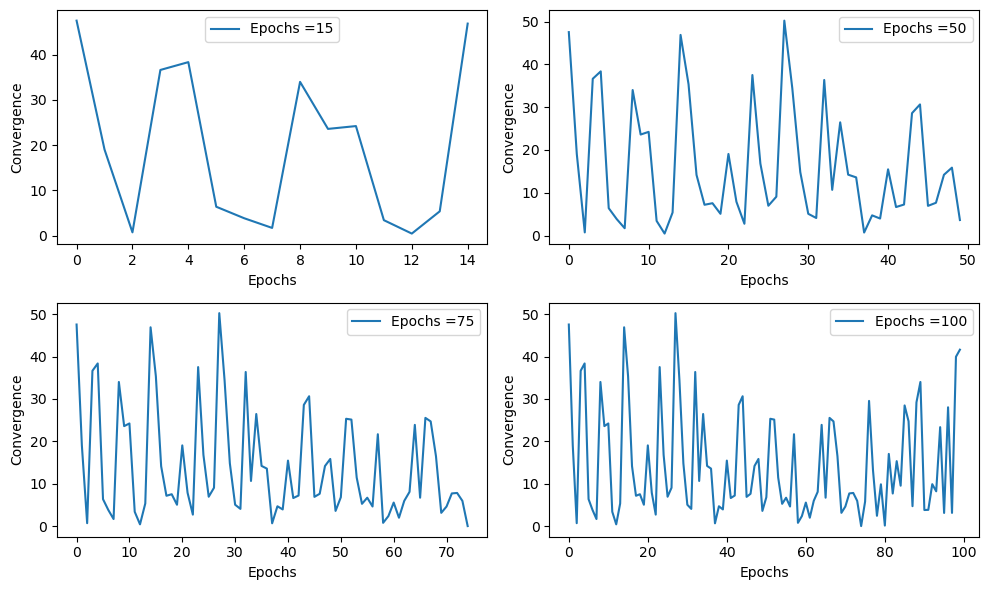

In [16]:
convergence= []

for i in range(100):
    Z = loss[i+1] - loss[i]
    convergence.append(np.abs(Z))
fig = plt.figure(figsize = (10,6))

for idx, j in enumerate([15, 50, 75, 100] , start = 1):
    ax = fig.add_subplot(2, 2, idx)
    ax.plot(np.arange(j), convergence[:j] , label = f"Epochs ={j}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Convergence")
    ax.legend()
    

plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

def MBGD(epochs, learning_rate, theta_0, theta_1, x1, y, batch_size):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    
    for i in range(epochs):
        for j in range(int(len(x1) / batch_size)):
            idx = random.sample(range(len(x1)), batch_size)
            x1_batch = x1[idx]
            y_batch = y[idx]
            
            y_hat = theta_1 * x1_batch + theta_0
            curr_loss = np.mean((y_batch - y_hat) ** 2)
    
            grad_theta_0 = -2 * np.mean(y_batch - y_hat)
            grad_theta_1 = -2 * np.mean((y_batch - y_hat) * x1_batch)
    
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
    
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
    
            loss.append(curr_loss)
            diff.append(abs(prev_loss - curr_loss))
    
            if abs(prev_loss - curr_loss) < 0.001:
                print(f'Gradient Descent Converged at Epoch {i+1}')
                break
    
            prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list


In [18]:
diff, loss, theta_0_list, theta_1_list = MBGD(200 , 0.01 , 0 , 1 , X1 , y1 , 5)

Gradient Descent Converged at Epoch 53
Gradient Descent Converged at Epoch 112
Theta_0 is 4.035447397819919 and Theta_1 is 3.5053792767643 at epoch 200


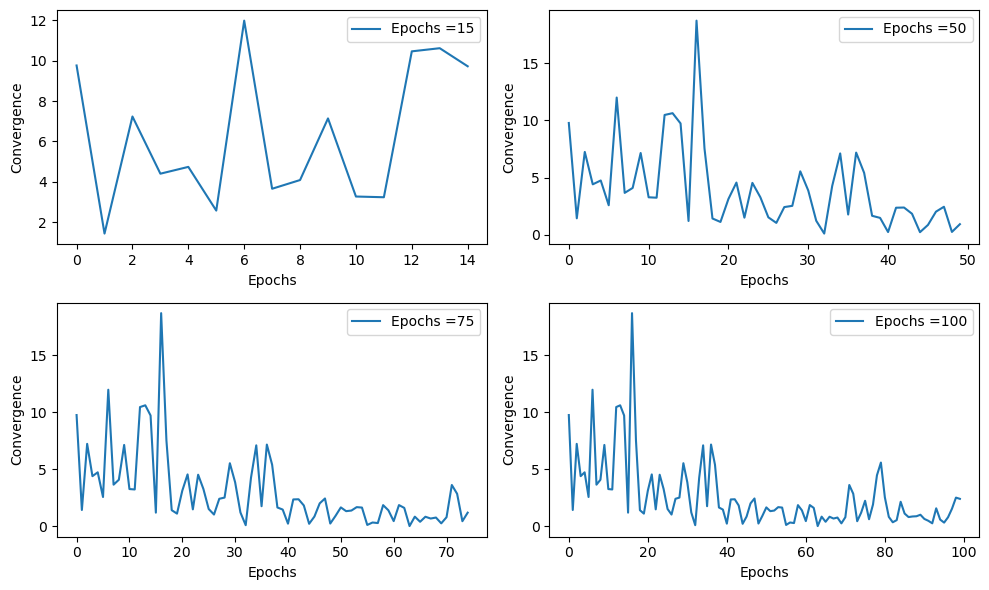

In [19]:
convergence= []

for i in range(100):
    Z = loss[i+1] - loss[i]
    convergence.append(np.abs(Z))
fig = plt.figure(figsize = (10,6))

for idx, j in enumerate([15, 50, 75, 100] , start = 1):
    ax = fig.add_subplot(2,2 ,idx)
    ax.plot(np.arange(j), convergence[:j] , label = f"Epochs ={j}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Convergence")
    ax.legend()
    

plt.tight_layout()
plt.show()

### Contour plots for convergence

Gradient Descent Converged at Epoch 213
Theta_0 is 3.846653298213561 and Theta_1 is 2.8251071983207425 at epoch 213


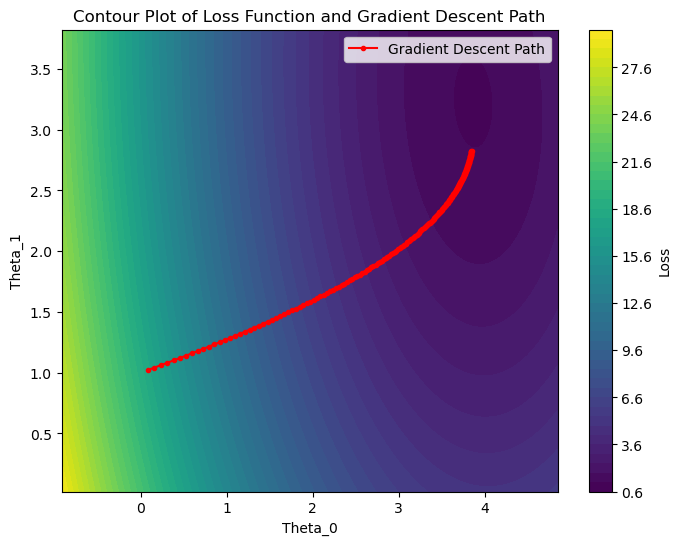

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def FBGD(epochs, learning_rate, theta_0, theta_1, x1, y):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    for i in range(epochs):
        y_hat = theta_1 * x1 + theta_0
        curr_loss = np.sum((y - y_hat) ** 2) / len(x1)

        grad_theta_0 = -2 * np.sum(y - y_hat) / len(x1)
        grad_theta_1 = -2 * np.sum((y - y_hat) * x1) / len(x1)

        theta_0 = theta_0 - learning_rate * grad_theta_0
        theta_1 = theta_1 - learning_rate * grad_theta_1

        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)

        loss.append(curr_loss)
        diff.append(abs(prev_loss - curr_loss))

        if abs(prev_loss - curr_loss) < 0.001:
            print(f'Gradient Descent Converged at Epoch {i + 1}')
            break

        prev_loss = curr_loss

    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i + 1}')
    return diff, loss, theta_0_list, theta_1_list

# Generate data
num_samples = 40
X1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * X1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps

# Run Gradient Descent
learning_rate = 0.01
epochs = 300
initial_theta_0 = 0
initial_theta_1 = 1
diff, loss, theta_0_list, theta_1_list = FBGD(epochs, learning_rate, initial_theta_0, initial_theta_1, X1, y1)

# Plotting the loss function
theta_0_range = np.linspace(min(theta_0_list) - 1, max(theta_0_list) + 1, 100)
theta_1_range = np.linspace(min(theta_1_list) - 1, max(theta_1_list) + 1, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)
Loss = np.zeros_like(Theta_0)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        y_hat = Theta_1[i, j] * X1 + Theta_0[i, j]
        Loss[i, j] = np.sum((y1 - y_hat) ** 2) / len(X1)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
ax.plot(theta_0_list, theta_1_list, 'ro-', markersize=3, label='Gradient Descent Path')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_title('Contour Plot of Loss Function and Gradient Descent Path')
fig.colorbar(contour, ax=ax, label='Loss')
ax.legend()

# Animation
def animate(i):
    ax.clear()
    ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
    ax.plot(theta_0_list[:i+1], theta_1_list[:i+1], 'ro-', markersize=3, label='Full Batch Gradient Descent Path')
    ax.set_xlabel('Theta_0')
    ax.set_ylabel('Theta_1')
    ax.set_title('Contour Plot of Loss Function and Full Batch Gradient Descent Path')
    fig.colorbar(contour, ax=ax, label='Loss')
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=len(theta_0_list), interval=50, repeat=False)

plt.show()

Theta_0 is 3.8593393096824182 and Theta_1 is 2.7107289973195594 at epoch 300


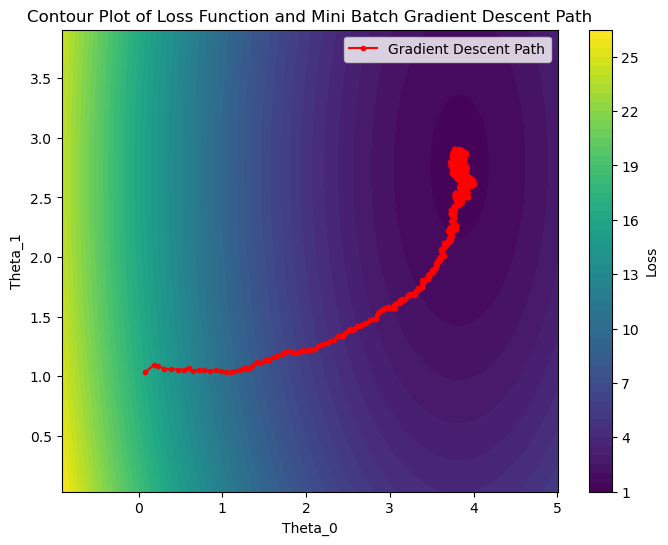

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def MBGD(epochs, learning_rate, theta_0, theta_1, x1, y, batch_size):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    
    for i in range(epochs):
        for j in range(int(len(x1) / batch_size)):
            idx = random.sample(range(len(x1)), batch_size)
            x1_batch = x1[idx]
            y_batch = y[idx]
            
            y_hat = theta_1 * x1_batch + theta_0
            curr_loss = np.mean((y_batch - y_hat) ** 2)
    
            grad_theta_0 = -2 * np.mean(y_batch - y_hat)
            grad_theta_1 = -2 * np.mean((y_batch - y_hat) * x1_batch)
    
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
    
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
    
            loss.append(curr_loss)
            diff.append(abs(prev_loss - curr_loss))
    
            if abs(prev_loss - curr_loss) < 0.001:
                print(f'Gradient Descent Converged at Epoch {i+1}')
                break
    
            prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list

# Generate data
num_samples = 40
X1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * X1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps

# Run Mini-Batch Gradient Descent
learning_rate = 0.01
epochs = 300
batch_size = 5
initial_theta_0 = 0
initial_theta_1 = 1
diff, loss, theta_0_list, theta_1_list = MBGD(epochs, learning_rate, initial_theta_0, initial_theta_1, X1, y1, batch_size)

# Plotting the loss function
theta_0_range = np.linspace(min(theta_0_list) - 1, max(theta_0_list) + 1, 100)
theta_1_range = np.linspace(min(theta_1_list) - 1, max(theta_1_list) + 1, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)
Loss = np.zeros_like(Theta_0)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        y_hat = Theta_1[i, j] * X1 + Theta_0[i, j]
        Loss[i, j] = np.mean((y1 - y_hat) ** 2)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
ax.plot(theta_0_list, theta_1_list, 'ro-', markersize=3, label='Gradient Descent Path')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_title('Contour Plot of Loss Function and Mini Batch Gradient Descent Path')
fig.colorbar(contour, ax=ax, label='Loss')
ax.legend()

# Animation
def animate(i):
    ax.clear()
    ax.contourf(Theta_1,Theta_0, Loss, levels=50, cmap='viridis')
    ax.plot(theta_0_list[:i+1], theta_1_list[:i+1], 'ro-', markersize=0.1, label='Gradient Descent Path')
    ax.set_xlabel('Theta_0')
    ax.set_ylabel('Theta_1')
    ax.set_title('Contour Plot of Loss Function and Gradient Descent Path')
    fig.colorbar(contour, ax=ax, label='Loss')
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=len(theta_0_list), interval=50, repeat=False)

plt.show()


Gradient Descent Converged at Epoch 11
Gradient Descent Converged at Epoch 12
Gradient Descent Converged at Epoch 17
Gradient Descent Converged at Epoch 19
Gradient Descent Converged at Epoch 24
Gradient Descent Converged at Epoch 36
Gradient Descent Converged at Epoch 37
Theta_0 is 3.6735462713291476 and Theta_1 is 2.8740503958704657 at epoch 40


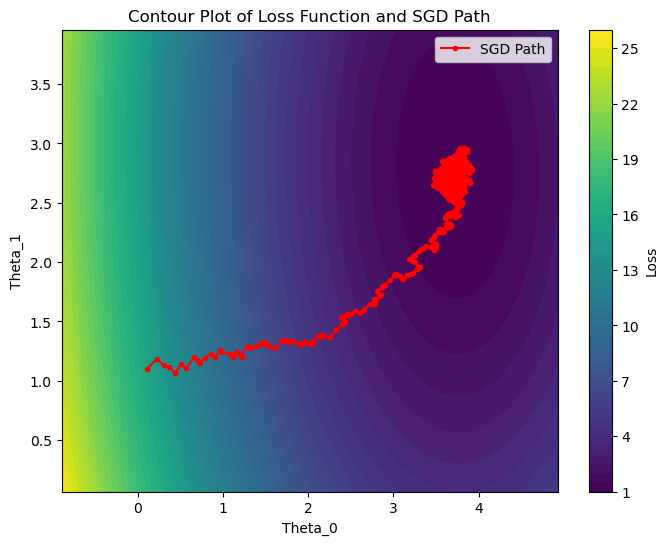

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def SBGD(epochs, learning_rate, theta_0, theta_1, x1, y):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    
    for i in range(epochs):
        for j in range(len(x1)):
            idx = np.random.randint(len(x1))
            y_hat = theta_1 * x1[idx] + theta_0
            curr_loss = (y[idx] - y_hat) ** 2
    
            grad_theta_0 = -2 * (y[idx] - y_hat)
            grad_theta_1 = -2 * (y[idx] - y_hat) * x1[idx]
    
            theta_0 = theta_0 - learning_rate * grad_theta_0
            theta_1 = theta_1 - learning_rate * grad_theta_1
    
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
    
            loss.append(curr_loss)
            diff.append(abs(prev_loss - curr_loss))
    
            if abs(prev_loss - curr_loss) < 0.001:
                print(f'Gradient Descent Converged at Epoch {i+1}')
                break
    
            prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list

# Generate data
num_samples = 40
X1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * X1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps

# Run Stochastic Gradient Descent
learning_rate = 0.01
epochs = 40
initial_theta_0 = 0
initial_theta_1 = 1
diff, loss, theta_0_list, theta_1_list = SBGD(epochs, learning_rate, initial_theta_0, initial_theta_1, X1, y1)

# Plotting the loss function
theta_0_range = np.linspace(min(theta_0_list) - 1, max(theta_0_list) + 1, 100)
theta_1_range = np.linspace(min(theta_1_list) - 1, max(theta_1_list) + 1, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)
Loss = np.zeros_like(Theta_0)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        y_hat = Theta_1[i, j] * X1 + Theta_0[i, j]
        Loss[i, j] = np.mean((y1 - y_hat) ** 2)

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
ax.plot(theta_0_list, theta_1_list, 'ro-', markersize=3, label='SGD Path')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_title('Contour Plot of Loss Function and SGD Path')
fig.colorbar(contour, ax=ax, label='Loss')
ax.legend()

# Animation
def animate(i):
    ax.clear()
    ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
    ax.plot(theta_0_list[:i+1], theta_1_list[:i+1], 'r:-', markersize=3, label='SGD Path')
    ax.set_xlabel('Theta_0')
    ax.set_ylabel('Theta_1')
    ax.set_title('Contour Plot of Loss Function and SGD Path')
    fig.colorbar(contour, ax=ax, label='Loss')
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=len(theta_0_list), interval=50, repeat=False)

plt.show()


### Observations for Q 3:

Here we have implemented Grdient descent in three different ways:

* Full batch grdient descent:
It take more time to converge as it gets updates once in every epoch.(150+ epochs to converge) But it is steady and sometimes can lead to converge at local minima. It performs best in small data sets.

* Stochastic Gradient descent:
Here parameters get updates by viewing each rows so it converges faster in less epochs(Even 10-20). It is Stochastic ie fluctuates very much so we have to use variable learning rate as with epochs so converge completely. Sometime these fluctuation might help in reaching global minima.It is used when our data size is very large 

* Mini Batch Gradient descent:
It is middle of both the cases. In This parameters get updates on the basis of samples form data (i.e 10 Rows ). It converges in 20-50 epochs. As it is random sometimes can take less can take more. It is used when data size is moderate.

### Q : 4)

Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an $ ϵ $
-neighborhood for both dataset. Choose 
$ ϵ
=
0.001 $  
. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc

1. Full-Batch Gradient Descent with Momentum:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def FBGD_Momentum(epochs, learning_rate, momentum, theta_0, theta_1, x1, y, epsilon=0.001):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    v_theta_0 = 0
    v_theta_1 = 0
    
    for i in range(epochs):
        y_hat = theta_1 * x1 + theta_0
        curr_loss = np.mean((y - y_hat) ** 2)
        
        grad_theta_0 = -2 * np.mean(y - y_hat)
        grad_theta_1 = -2 * np.mean((y - y_hat) * x1)
        
        v_theta_0 = momentum * v_theta_0 - learning_rate * grad_theta_0
        v_theta_1 = momentum * v_theta_1 - learning_rate * grad_theta_1
        
        theta_0 += v_theta_0
        theta_1 += v_theta_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        loss.append(curr_loss)
        diff.append(abs(prev_loss - curr_loss))
        
        if abs(prev_loss - curr_loss) < epsilon:
            print(f'Gradient Descent with Momentum Converged at Epoch {i+1}')
            break
        
        prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list

learning_rate = 0.01
momentum = 0.9
epochs = 100
theta_0 = 0
theta_1 = 1
diff, loss, theta_0_list, theta_1_list = FBGD_Momentum(epochs, learning_rate, momentum, theta_0, theta_1, x1, y, epsilon=0.001)

Gradient Descent with Momentum Converged at Epoch 61
Theta_0 is 3.9879776340781086 and Theta_1 is 2.7893555531643743 at epoch 61


2. Stochastic Gradient Descent with Momentum:

In [24]:
def SBGD_Momentum(epochs, learning_rate, momentum, theta_0, theta_1, x1, y, epsilon=0.001):
    diff = []
    loss = []
    prev_loss = float('inf')
    theta_0_list = []
    theta_1_list = []
    v_theta_0 = 0
    v_theta_1 = 0
    
    for i in range(epochs):
        for j in range(len(x1)):
            idx = np.random.randint(len(x1))
            y_hat = theta_1 * x1[idx] + theta_0
            curr_loss = (y[idx] - y_hat) ** 2
            
            grad_theta_0 = -2 * (y[idx] - y_hat)
            grad_theta_1 = -2 * (y[idx] - y_hat) * x1[idx]
            
            v_theta_0 = momentum * v_theta_0 - learning_rate * grad_theta_0
            v_theta_1 = momentum * v_theta_1 - learning_rate * grad_theta_1
            
            theta_0 += v_theta_0
            theta_1 += v_theta_1
            
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            
            loss.append(curr_loss)
            diff.append(abs(prev_loss - curr_loss))
            
            if abs(prev_loss - curr_loss) < epsilon:
                print(f'Gradient Descent with Momentum Converged at Epoch {i+1}')
                break
        
            prev_loss = curr_loss
    
    print(f'Theta_0 is {theta_0} and Theta_1 is {theta_1} at epoch {i+1}')
    
    return diff, loss, theta_0_list, theta_1_list

learning_rate = 0.01
momentum = 0.9
epochs = 20
theta_0 = 0
theta_1 = 1
diff, loss, theta_0_list, theta_1_list = SBGD_Momentum(epochs, learning_rate, momentum, theta_0, theta_1, x1, y, epsilon=0.001)


Gradient Descent with Momentum Converged at Epoch 3
Gradient Descent with Momentum Converged at Epoch 9
Gradient Descent with Momentum Converged at Epoch 11
Gradient Descent with Momentum Converged at Epoch 17
Theta_0 is 3.845218007965341 and Theta_1 is 2.8323222902407466 at epoch 20


1. Visualization for Full-Batch Gradient Descent with Momentum:

Theta_0 is 3.976263635973941 and Theta_1 is 1.737553487100425 at epoch 15


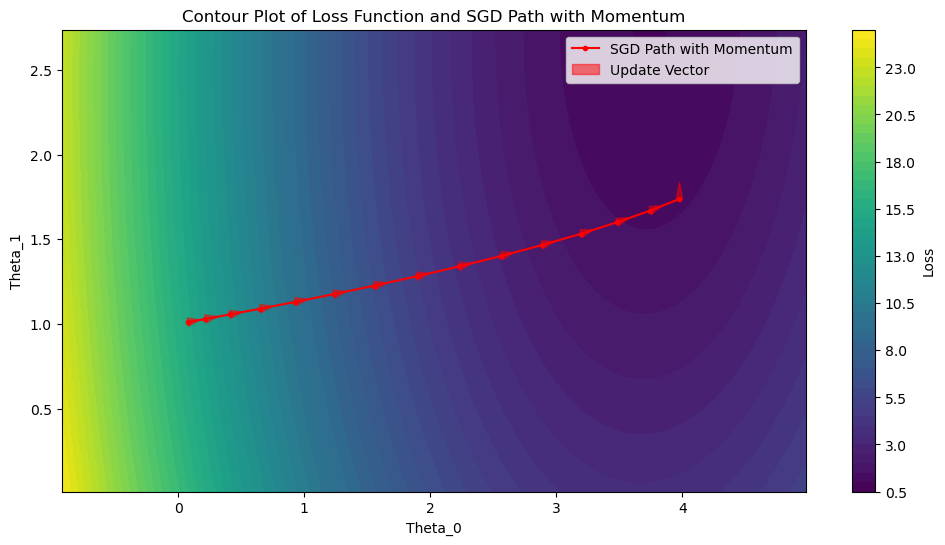

In [25]:
# Generate data
num_samples = 40
X1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * X1 + 4
eps = np.random.randn(num_samples)
y1 = f_x + eps

# Run Full-Batch Gradient Descent with Momentum
learning_rate = 0.01
momentum = 0.9
epochs = 15
initial_theta_0 = 0
initial_theta_1 = 1
diff, loss, theta_0_list, theta_1_list = FBGD_Momentum(epochs, learning_rate, momentum, initial_theta_0, initial_theta_1, X1, y1)

# Create contour plot
theta_0_range = np.linspace(min(theta_0_list) - 1, max(theta_0_list) + 1, 100)
theta_1_range = np.linspace(min(theta_1_list) - 1, max(theta_1_list) + 1, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)
Loss = np.zeros_like(Theta_0)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        y_hat = Theta_1[i, j] * X1 + Theta_0[i, j]
        Loss[i, j] = np.mean((y1 - y_hat) ** 2)

# Plotting the convergence process
fig, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
ax.plot(theta_0_list, theta_1_list, 'ro-', markersize=3, label='SGD Path with Momentum')

# Adding vectors
for idx in range(0, len(theta_0_list), max(1, len(theta_0_list)//15)):  # Adjust step for clarity
    ax.arrow(theta_0_list[idx], theta_1_list[idx], 
             -learning_rate * (theta_0_list[idx] - theta_0_list[min(idx+1, len(theta_0_list)-1)]), 
             -learning_rate * (theta_1_list[idx] - theta_1_list[min(idx+1, len(theta_1_list)-1)]), 
             head_width=0.05, head_length=0.1, fc='r', ec='r', alpha=0.5, label='Update Vector' if idx == 0 else "")

ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_title('Contour Plot of Loss Function and SGD Path with Momentum')
fig.colorbar(contour, ax=ax, label='Loss')
ax.legend()
plt.show()


2. Visualization for Stochastic Gradient Descent with Momentum:

Theta_0 is 3.1056970783024935 and Theta_1 is 3.058713623412094 at epoch 15


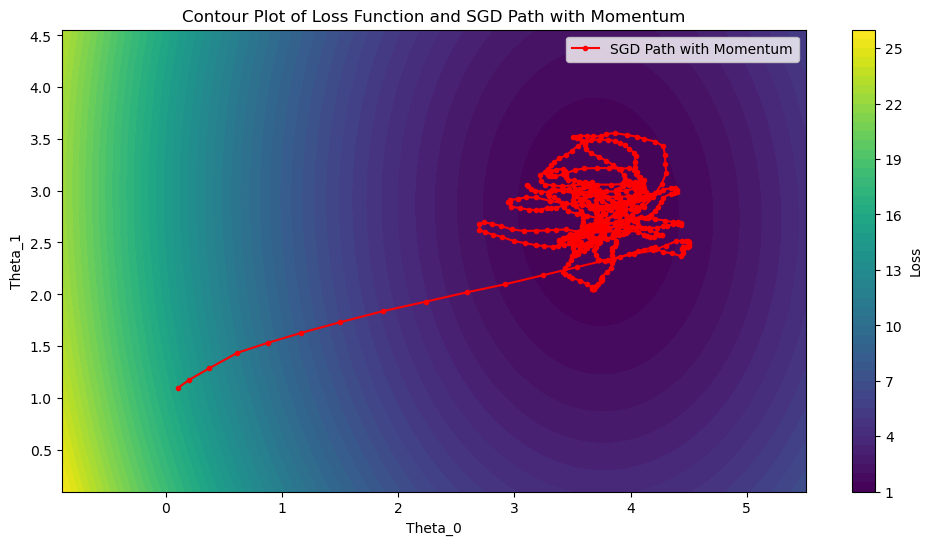

In [41]:
# Run Stochastic Gradient Descent with Momentum
learning_rate = 0.01
momentum = 0.9
epochs = 15
initial_theta_0 = 0
initial_theta_1 = 1
diff, loss, theta_0_list, theta_1_list = SBGD_Momentum(epochs, learning_rate, momentum, initial_theta_0, initial_theta_1, X1, y1)

# Create contour plot
theta_0_range = np.linspace(min(theta_0_list) - 1, max(theta_0_list) + 1, 100)
theta_1_range = np.linspace(min(theta_1_list) - 1, max(theta_1_list) + 1, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)
Loss = np.zeros_like(Theta_0)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        y_hat = Theta_1[i, j] * X1 + Theta_0[i, j]
        Loss[i, j] = np.mean((y1 - y_hat) ** 2)

# Plotting the convergence process
fig, ax = plt.subplots(figsize=(12, 6))
contour = ax.contourf(Theta_0, Theta_1, Loss, levels=50, cmap='viridis')
ax.plot(theta_0_list, theta_1_list, 'ro-', markersize=3, label='SGD Path with Momentum')
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_title('Contour Plot of Loss Function and SGD Path with Momentum')
fig.colorbar(contour, ax=ax, label='Loss')
ax.legend()
plt.show()


### Observations

* Momentum generally speeds up convergence by accelerating gradients vectors in the right directions, thus leading to faster convergence compared to vanilla gradient descent.

* Momentum-based methods typically require fewer epochs or iterations to converge within a specified 
ϵ-neighborhood, showing improved performance.  As it takes 61 epochs to converge  earlies it took 213 epochs 